In [1]:
!python3 -m pip install -e . jinja2

Obtaining file:///Users/satyaortiz-gagne/CODE/iguane-rgu
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/mila-iqia/IGUANE to /private/var/folders/bx/pqctx6hn02x0y6s74xmq6ylm0000gp/T/pip-install-3r4ep6cb/iguane_9377058f0747499786f0752cb74850b7
  Running command git clone --filter=blob:none --quiet https://github.com/mila-iqia/IGUANE /private/var/folders/bx/pqctx6hn02x0y6s74xmq6ylm0000gp/T/pip-install-3r4ep6cb/iguane_9377058f0747499786f0752cb74850b7
  Resolved https://github.com/mila-iqia/IGUANE to commit cd533d9b04434df5ff0497aa4880cdd4bc26cdf7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/mila-iqia/milabench (to revision v1.0.0) to /private/v

In [2]:
import logging
import json
from pathlib import Path
import subprocess
import sys

import pandas as pd
import seaborn as sns

from iguane_rgu.gpu_data import REF_GPU, NORMALIZED_GPU_DATA
from iguane_rgu.lin_reg_strategies import mean_per_bench_lin_reg, prepare_perf_ram_df
from iguane_rgu.milabench_data import compute_optimal_scores, load_milabench_data

In [3]:
logging.basicConfig(level=logging.DEBUG, force=True)

# Change display settings to show the entire table
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1024)  # No line width limit
pd.set_option("display.max_colwidth", None)  # Show full content of each cell

full_df = load_milabench_data(Path("milabench/report.csv"))

print(full_df)

                                                           fail  n  ngpu       perf   sem%   std%  peak_memory      score  weight
gpu                   bench                    batch_size                                                                        
NVIDIA-A100-SXM4-40GB bert-tf32-fp16           36             0  1     1     265.77  0.002  0.013          NaN     265.77     1.0
                                               46             0  1     1     270.26  0.003  0.016          NaN     270.26     1.0
                                               68             0  1     1     284.72  0.001  0.005          NaN     284.72     1.0
                                               80             0  1     1     289.72  0.001  0.006       1316.0     289.72     1.0
                                               86             0  1     1     290.00  0.001  0.007          NaN     290.00     1.0
                                               90             0  1     1     294.18  0.000

In [4]:
scores = compute_optimal_scores(full_df)
normalized_scores = scores / scores.loc[REF_GPU]
print(scores)
print(normalized_scores)

DEBUG:root:
                                                           fail    n  ngpu       perf   sem%   std%  peak_memory      score  weight
gpu                   bench                    batch_size                                                                          
NVIDIA-A100-SXM4-40GB bert-tf32-fp16           90           0.0  1.0   1.0     294.18  0.000  0.002       2035.0     294.18     1.0
                      brax                     147456       0.0  1.0   1.0  362575.85  0.001  0.001      31297.0  362575.85     1.0
                      convnext_large-tf32-fp16 196          0.0  1.0   1.0     355.93  0.000  0.002      40188.0     355.93     1.0
                      diffusion-gpus           18           0.0  1.0   4.0      92.26  0.009  0.071      40646.0      92.26     1.0
                      dimenet                  90           0.0  1.0   1.0     929.42  0.010  0.080      15691.0     929.42     2.0
                      dinov2-giant-gpus        18           0.0 

gpu
NVIDIA-A100-SXM4-40GB     885.568955
NVIDIA-A100-SXM4-80GB    1491.501352
NVIDIA-H100-80GB-HBM3    2435.582039
NVIDIA-L40S               907.065590
Quadro-RTX-8000           228.404905
Tesla-V100-SXM2-32GB      211.205733
dtype: float64
gpu
NVIDIA-A100-SXM4-40GB    0.593743
NVIDIA-A100-SXM4-80GB    1.000000
NVIDIA-H100-80GB-HBM3    1.632973
NVIDIA-L40S              0.608156
Quadro-RTX-8000          0.153138
Tesla-V100-SXM2-32GB     0.141606
dtype: float64


In [5]:
plot_df = prepare_perf_ram_df(full_df)

mean_coef = mean_per_bench_lin_reg(plot_df, scores)

print(f"Mean m peak_memory =", mean_coef)

mean_m_ram = mean_coef

DEBUG:root:
                      gpu    perf  batch_size  peak_memory  weight           bench
0   NVIDIA-A100-SXM4-40GB  265.77          36          NaN     1.0  bert-tf32-fp16
1   NVIDIA-A100-SXM4-40GB  270.26          46          NaN     1.0  bert-tf32-fp16
2   NVIDIA-A100-SXM4-40GB  284.72          68          NaN     1.0  bert-tf32-fp16
4   NVIDIA-A100-SXM4-40GB  290.00          86          NaN     1.0  bert-tf32-fp16
6   NVIDIA-A100-SXM4-80GB  282.69          36          NaN     1.0  bert-tf32-fp16
7   NVIDIA-A100-SXM4-80GB  287.89          46          NaN     1.0  bert-tf32-fp16
8   NVIDIA-A100-SXM4-80GB  292.59          50          NaN     1.0  bert-tf32-fp16
9   NVIDIA-A100-SXM4-80GB  295.99          52          NaN     1.0  bert-tf32-fp16
10  NVIDIA-A100-SXM4-80GB  298.73          54          NaN     1.0  bert-tf32-fp16
11  NVIDIA-A100-SXM4-80GB  296.75          56          NaN     1.0  bert-tf32-fp16
12  NVIDIA-A100-SXM4-80GB  302.16          64          NaN     1.0  bert-tf

Mean m peak_memory = 0.00279974952793018


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/satyaortiz-gagne/Library/Application Support/hatch/env/virtual/iguane-rgu/7Cs0Oo-q/iguane-rgu/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/satyaortiz-gagne/Library/Application Support/hatch/env/virtual/iguane-rgu/7Cs0Oo-q/iguane-rgu/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=40

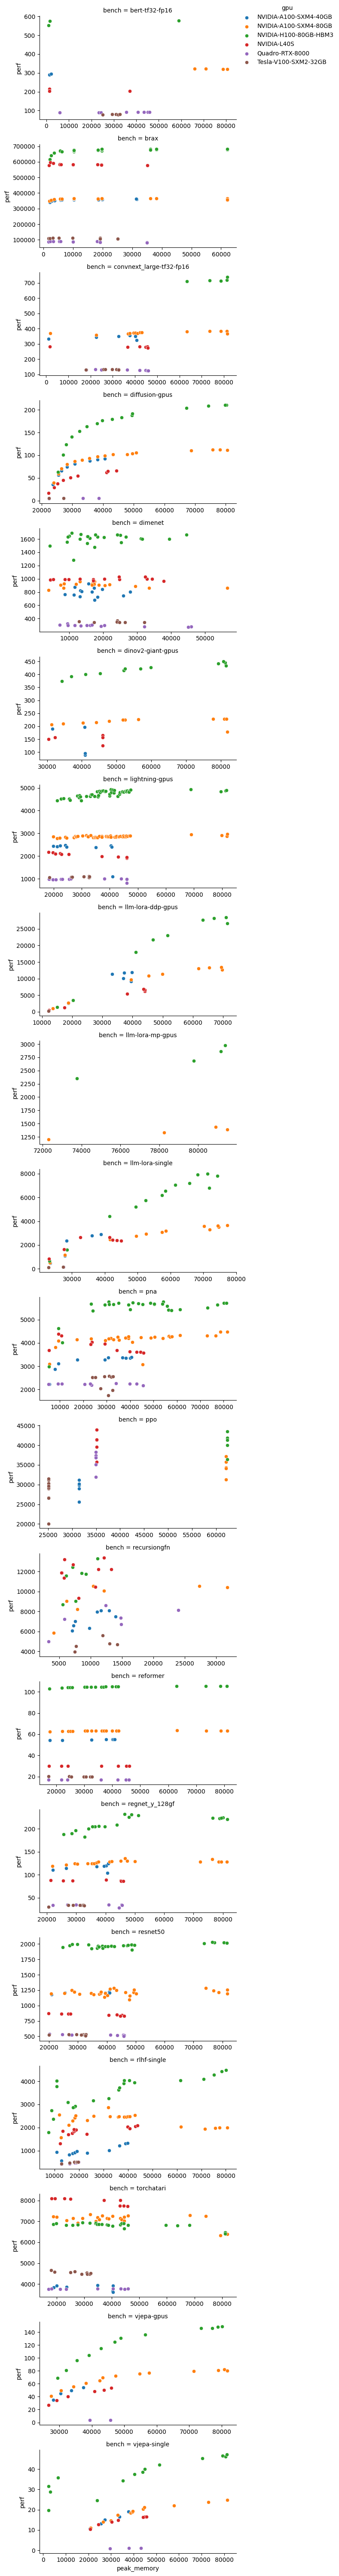

In [6]:
graph = sns.FacetGrid(
    plot_df, row="bench", hue="gpu", sharex=False, sharey=False, aspect=2
)
graph.map(sns.scatterplot, "peak_memory", "perf").add_legend(loc="upper right")

In [7]:
import functools

from iguane_rgu.lin_reg_strategies import (
    _linreg,
    _linreg_custom,
    _linreg_ram as __linreg_ram,
)


_linreg_ram = functools.partial(__linreg_ram, mean_m_ram=mean_m_ram)


def _print_coefs(label, coefficients, dropped_columns):
    coefficients.loc["sum to 1"] = coefficients.loc["raw"] / sum(
        coefficients.loc["raw"]
    )
    coefficients.loc["floor 0.05", coefficients.loc["floor 0.05"] < 0.05] = 0.05
    coefficients.loc["floor sum to 1"] = coefficients.loc["floor 0.05"] / sum(
        coefficients.loc["floor 0.05"]
    )

    for dropped_column in dropped_columns:
        if dropped_column not in coefficients:
            coefficients[dropped_column] = 0.0

    coefficients = coefficients[NORMALIZED_GPU_DATA.columns]

    print(
        label,
        "Coefficients (β₁, β₂, ... β₆):",
        coefficients,
        sep="\n",
    )


for func, dropped_columns in [
    [_linreg, ["tdp"]],
    [_linreg, ["fp64", "tf32", "tdp"]],
    [_linreg_ram, ["fp64", "tf32", "memgb", "tdp"]],
    [_linreg_custom, ["fp64", "tdp"]],
]:
    coefficients = func(
        NORMALIZED_GPU_DATA.drop(columns=dropped_columns),
        normalized_scores,
        dropped_columns,
    )
    _print_coefs(f"{func} {dropped_columns}", coefficients, dropped_columns)
    print()

<function _linreg at 0x15e996830> ['tdp']
Coefficients (β₁, β₂, ... β₆):
                    fp16      fp32      fp64      tf32     memgb     membw  tdp
raw             0.000000  0.000000  0.038074  0.339318  0.451748  0.000000  0.0
sum to 1        0.000000  0.000000  0.045920  0.409240  0.544840  0.000000  0.0
floor 0.05      0.050000  0.050000  0.050000  0.339318  0.451748  0.050000  0.0
floor sum to 1  0.050451  0.050451  0.050451  0.342376  0.455821  0.050451  0.0

<function _linreg at 0x15e996830> ['fp64', 'tf32', 'tdp']
Coefficients (β₁, β₂, ... β₆):
                    fp16     fp32  fp64      tf32     memgb     membw  tdp
raw             0.179656  0.00000   0.0  0.179656  0.314689  0.084401  0.0
sum to 1        0.236888  0.00000   0.0  0.236888  0.414936  0.111288  0.0
floor 0.05      0.179656  0.05000   0.0  0.179656  0.314689  0.084401  0.0
floor sum to 1  0.222236  0.06185   0.0  0.222236  0.389272  0.104405  0.0

functools.partial(<function _linreg_ram at 0x15e996950>, mean

In [ ]:
from io import StringIO


def parse_coefs_csv(data: str):
    data_io = StringIO(data)
    df = pd.read_csv(data_io, sep=r"\s+", engine="python")
    return {idx: float(df.iloc[1][idx]) for idx in df.iloc[1].index}


def iguane_outs():
    IGUANE_GPUS = [
        "P100",
        "V100",
        "RTX8000",
        "A100",
        "L40S",
        "H100",
        "MI325X",
        "MI300X",
    ]
    EMPTY_COEFS = {
        "fp16": 0.0,
        "fp32": 0.0,
        "fp64": 0.0,
        "tf32": 0.0,
        "memgb": 0.0,
        "membw": 0.0,
        "tdp": 0.0,
    }
    # fmt: off
    coefs = [
        {
            "ref": "A100-SXM4-80GB",
            "fp16": 0.20, "fp32": 0.20, "fp64": 0.20, "tf32": 0.20, "memgb": 0.20, "membw": 0.20,
        },
        #           fp16      fp32      fp64      tf32     memgb     membw
        #       0.000000  0.000000  0.038074  0.339318  0.451748  0.000000
        #       0.000000  0.000000  0.045920  0.409240  0.544840  0.000000
        #       0.050000  0.050000  0.050000  0.339318  0.451748  0.050000
        #       0.050451  0.050451  0.050451  0.342376  0.455821  0.050451
        {
            "ref": "A100-SXM4-80GB",
            **EMPTY_COEFS,
            **parse_coefs_csv(
                """
                    fp16      fp32      fp64      tf32     memgb     membw
                0.000000  0.000000  0.038074  0.339318  0.451748  0.000000
                0.000000  0.000000  0.045920  0.409240  0.544840  0.000000
                """
            )
        },
        #           fp16     fp32       fp64      tf32     memgb     membw
        #       0.179656  0.00000        0.0  0.179656  0.314689  0.084401
        #       0.236888  0.00000        0.0  0.236888  0.414936  0.111288
        #       0.179656  0.05000        0.0  0.179656  0.314689  0.084401
        #       0.222236  0.06185        0.0  0.222236  0.389272  0.104405
        {
            "ref": "A100-SXM4-80GB",
            **EMPTY_COEFS,
            **parse_coefs_csv(
                """
                    fp16      fp32      fp64      tf32     memgb     membw
                0.179656  0.00000        0.0  0.179656  0.314689  0.084401
                0.473776  0.00000        0.0       0.0  0.414936  0.111288
                """
            )
        },
        {
            "ref": "A100-SXM4-80GB",
            **EMPTY_COEFS,
            **parse_coefs_csv(
                """
                    fp16      fp32      fp64      tf32     memgb     membw
                0.179656  0.00000        0.0  0.179656  0.314689  0.084401
                0.236888  0.00000        0.0  0.236888  0.414936  0.111288
                """
            )
        },
        #           fp16      fp32      fp64      tf32     memgb     membw
        #       0.131256  0.008997       0.0  0.131256  0.002800  0.384047
        #       0.199370  0.013666       0.0  0.199370  0.004253  0.583341
        #       0.131256  0.050000       0.0  0.131256  0.050000  0.384047
        #       0.175815  0.066974       0.0  0.175815  0.066974  0.514422
        {
            "ref": "A100-SXM4-80GB",
            **EMPTY_COEFS,
            **parse_coefs_csv(
                """
                    fp16      fp32      fp64      tf32     memgb     membw
                0.131256  0.008997       0.0  0.131256  0.002800  0.384047
                0.398740  0.013666       0.0       0.0  0.004253  0.583341
                """
            )
        },
        #           fp16      fp32      fp64      tf32     memgb     membw
        #       0.019478  0.009739       0.0  0.019478  0.166407  0.166407
        #       0.051055  0.025528       0.0  0.051055  0.436181  0.436181
        #       0.050000  0.050000       0.0  0.050000  0.166407  0.166407
        #       0.103560  0.103560       0.0  0.103560  0.344661  0.344661
        {
            "ref": "A100-SXM4-80GB",
            **EMPTY_COEFS,
            **parse_coefs_csv(
                """
                    fp16      fp32      fp64      tf32     memgb     membw
                0.019478  0.009739       0.0  0.019478  0.166407  0.166407
                0.051055  0.025528       0.0  0.051055  0.436181  0.436181
                """
            )
        },
        {
            "ref": "A100-SXM4-80GB",
            "fp16": 0.20, "fp32": 0.10, "fp64": 0.00, "tf32": 0.20, "memgb": 0.25, "membw": 0.25,
        },
    ]
    # fmt: on

    for i, v in enumerate(coefs):
        # Make sure we don't duplicate coefs
        assert (
            sum([_v == v for _v in coefs]) == 1
        ), f"Element {v} ({i}) is found multiple times"

    for args in [
        ["--norm", "--ugr"],
        *[["--norm", "--custom-weights", json.dumps(_coefs)] for _coefs in coefs],
    ]:
        p = subprocess.run(
            [sys.executable, "-m", "iguane"] + args,
            check=True,
            text=True,
            capture_output=True,
        )
        out = p.stdout.splitlines()
        out = [l for l in out if any(g.lower() in l.lower() for g in IGUANE_GPUS)]
        out = "\n".join([args[-1]] + out)
        yield out

In [9]:
milabench_scores = normalized_scores.reset_index(name="")
milabench_scores.loc[milabench_scores["gpu"] == "NVIDIA-A100-SXM4-40GB", "gpu"] = (
    "A100-SXM4-40GB"
)
milabench_scores.loc[milabench_scores["gpu"] == "NVIDIA-A100-SXM4-80GB", "gpu"] = (
    "A100-SXM4-80GB"
)
milabench_scores.loc[milabench_scores["gpu"] == "NVIDIA-H100-80GB-HBM3", "gpu"] = (
    "H100-SXM5-80GB"
)
milabench_scores.loc[milabench_scores["gpu"] == "NVIDIA-L40S", "gpu"] = "L40S"
milabench_scores.loc[milabench_scores["gpu"] == "Quadro-RTX-8000", "gpu"] = "RTX8000"
milabench_scores.loc[milabench_scores["gpu"] == "Tesla-V100-SXM2-32GB", "gpu"] = (
    "V100-SXM2-32GB"
)
milabench_scores = milabench_scores[["", "gpu"]]

outs = [
    f"""
Milabench
{milabench_scores.to_string(index=False, header=False)}
""",
    *list(iguane_outs()),
]
SPEC_FIELDS = {
    "fp16": "fp16",
    "fp32": "fp32",
    "fp64": "fp64",
    "tf32": "tf32",
    "memgb": "capacity",
    "membw": "bendwidth",
}

plot_data = []
milabench = None

for out in outs:
    out = out.strip().splitlines()
    profile = out.pop(0).replace("+ python3 -m iguane --norm --", "")
    _data = {"score": [], "gpu": []}
    for l in out:
        score = l.strip().split()[0]
        gpu = l.strip().split()[1]
        _data["score"].append(float(score))
        _data["gpu"].append(gpu)
    _df = pd.DataFrame(_data)

    try:
        profile = json.loads(profile)
        profile = {SPEC_FIELDS[k]: v for k, v in profile.items() if k in SPEC_FIELDS}
        profile = json.dumps(profile)
    except json.JSONDecodeError:
        pass

    _df["profile"] = profile
    _df.loc[:, "score"] = (
        _df["score"] / _df.loc[_df["gpu"] == "A100-SXM4-80GB", "score"].iloc[0]
    )
    plot_data.append(_df)

    if milabench is None:
        milabench = plot_data.pop(0).drop(columns="profile")
        milabench.rename(columns={"score": "milabench"}, inplace=True)

    else:
        plot_data[-1] = pd.merge(milabench, plot_data[-1], on="gpu")

/var/folders/bx/pqctx6hn02x0y6s74xmq6ylm0000gp/T/ipykernel_9131/2061320469.py:114: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values(by="milabench", ascending=False))


\begin{table}[ht]
    \centering
    \caption{--ugr}
    \label{tab:mytable}
    \begin{tabular}{lrr}
    \toprule
    \textbf{GPU}   & \textbf{Milabench}$^*$ & \textbf{Score} \\
    \midrule
    H100-SXM5-80GB & 1.63                   & 2.53           \\
    A100-SXM4-80GB & 1.00                   & 1.00           \\
    L40S           & 0.61                   & 2.16           \\
    A100-SXM4-40GB & 0.59                   & 0.83           \\
    RTX8000        & 0.15                   & 0.62           \\
    V100-SXM2-32GB & 0.14                   & 0.53           \\
    \midrule \midrule
    MSE            &                        & 0.61           \\
    \bottomrule
    \end{tabular}
    \caption*{$^*$Milabench scores normalized to A100-SXM4-80GB}
\end{table}

\begin{table}[ht]
    \centering
    \caption{\textbf{GPU Ranking} \\
        \( \beta_{\mbox{\footnotesize fp16}}=0.20 \), \( \beta_{\mbox{\footnotesize fp32}}=0.20 \), \( \beta_{\mbox{\footnotesize fp64}}=0.20 \), \( \beta_{

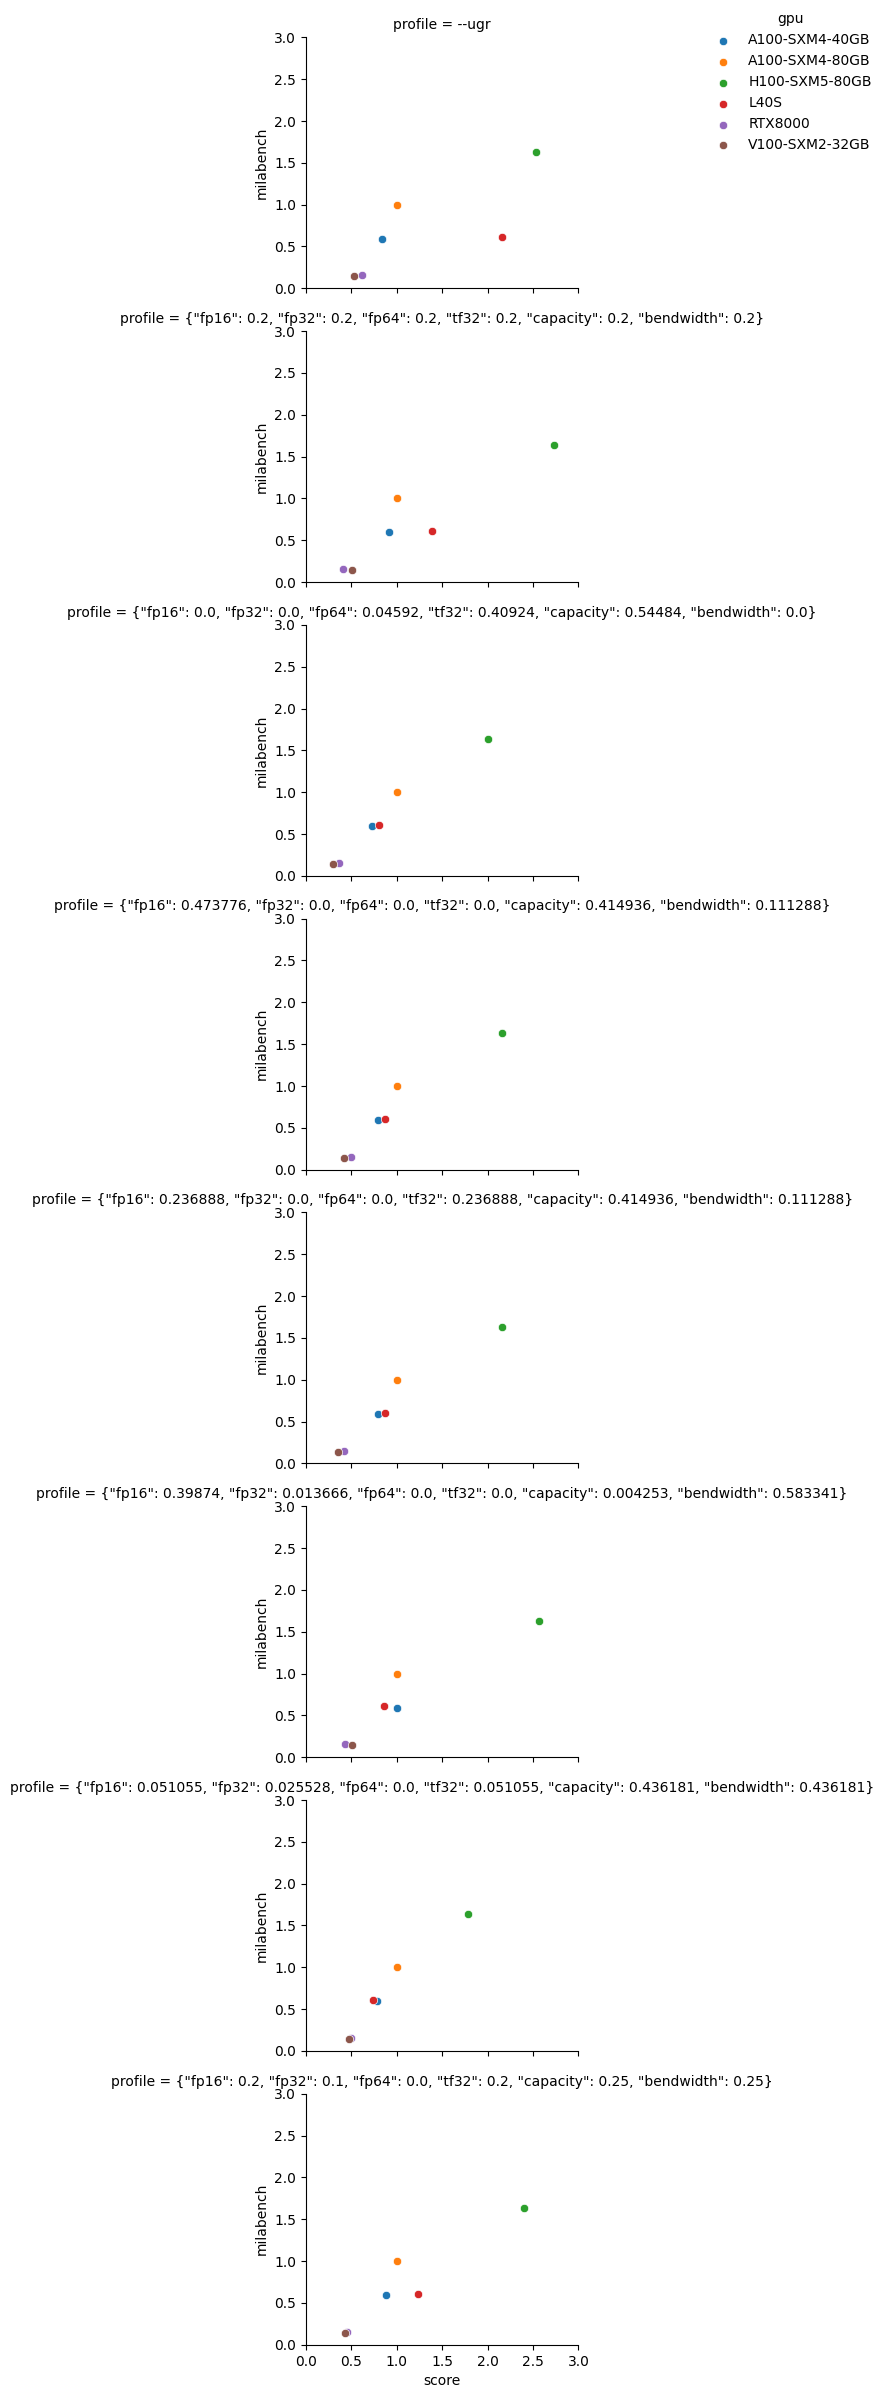

In [10]:
plot_df = pd.concat(plot_data).reset_index()

graph = sns.FacetGrid(
    plot_df,
    row="profile",
    hue="gpu",
    xlim=(0, 3),
    ylim=(0, 3),
    height=3,
    aspect=1.25,
)
graph.map(sns.scatterplot, "score", "milabench").add_legend(loc="upper right")


def to_latex(df: pd.DataFrame, profile: str):
    df = pd.concat(
        [
            df,
            pd.DataFrame(
                {
                    "gpu": ["MSE"],
                    "milabench": [""],
                    "score": [((df["milabench"] - df["score"]) ** 2).mean()],
                },
                index=((0, 0),),
            ),
        ]
    )

    df: pd.DataFrame = df.rename(
        columns={
            "gpu": "\\textbf{GPU}",
            "milabench": "\\textbf{Milabench}$^*$",
            "score": "\\textbf{Score}",
        }
    )

    try:
        caption = json.loads(profile)
        caption = "".join(
            [
                "\\textbf{GPU Ranking} \\\\\n    ",
                ", ".join(
                    [
                        "\\( \\beta_{\\mbox{\\footnotesize "
                        + k
                        + "}}="
                        + f"{v:.2f} \\)"
                        for k, v in caption.items()
                    ]
                ),
            ]
        )
    except json.JSONDecodeError:
        caption = profile

    table = df.to_latex(
        index=False,  # Don't include index
        float_format="%.2f",  # Round floats to 2 decimal places
        position="ht",  # Place table here
        caption=caption,  # Add caption
        label="tab:mytable",  # Add label for referencing
        column_format="l"
        + "r" * (df.shape[1] - 1),  # Left-align first col, right-align others
        escape=False,  # Don't escape special characters
        bold_rows=True,  # Bold the first column
    ).splitlines()

    lines = (
        table[:1]
        + [
            " " * 4 + l
            for l in [
                "\\centering",
                *table[1:-1],
                "\caption*{$^*$Milabench scores normalized to A100-SXM4-80GB}",
            ]
        ]
        + table[-1:]
    )

    cells_width = []
    for l in lines:
        if " & " in l:
            cells_width.append([len(cell) for cell in l.split(" \\\\")[0].split(" & ")])

    cells_width = [max(col) for col in zip(*cells_width)]

    _mse = None
    _midrule = None
    for i, l in enumerate(lines[:]):
        if " & " in l:
            cells = l.split(" \\\\")[0].split(" & ")
            cells = [cell.ljust(cells_width[i]) for i, cell in enumerate(cells)]
            lines[i] = " & ".join(cells) + " \\\\"

            # MSE is the last line
            _mse = lines[i]

        if "\\midrule" in l:
            _midrule = l

        if "\\bottomrule" in l:
            lines[i - 1] = f"{_midrule} \\midrule"
            lines[i] = _mse
            lines.insert(i + 1, l)

    return "\n".join(lines)


comparison_tables = (
    pd.concat(plot_data)
    .groupby("profile", sort=False)
    .apply(lambda x: x.sort_values(by="milabench", ascending=False))
    .loc[:, ("gpu", "milabench", "score")]
)

for profile, df in comparison_tables.groupby("profile", sort=False):
    print(to_latex(df, profile), "", sep="\n")